## Introduction
This notebook goes over the degree of fuzziness for a membership function mu, using three methods of defining the degree of fuzziness (M1, M2, and M3) - mathematically and visually-  as well as proving the relationship between the methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import skfuzzy
from skfuzzy import control as ctrl
from skfuzzy import defuzzify

import sympy as sy

In [2]:
dt= 0.01
S = np.arange(0,6+dt,dt) #supporting set S
l = 2
n = 2
a = 3

func = lambda x: math.exp(-l*((x-a)**n))
mu = np.vectorize(func)

mu = mu(S)
mu_c = 1-mu

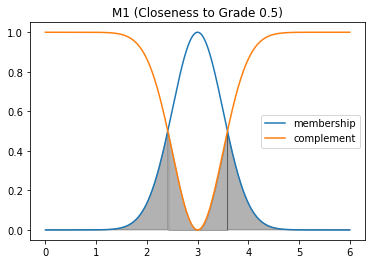

In [3]:
plt.plot(S,mu,label="membership")
plt.plot(S,mu_c,label="complement")
plt.fill_between(S,0,mu, where=(mu<0.5),interpolate=True,color="black",alpha=0.3)
plt.fill_between(S,0,mu_c, where=(mu_c<0.5),interpolate=True,color="black",alpha=0.3)

plt.legend()
plt.title('M1 (Closeness to Grade 0.5)')
plt.show()

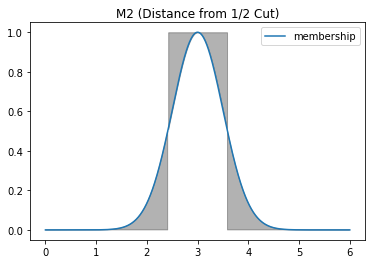

In [4]:
plt.plot(S,mu, label="membership")
plt.fill_between(S,0,mu, where=(mu<=0.5),interpolate=True,color="black",alpha=0.3)
plt.fill_between(S,mu,1, where=(mu>0.5),interpolate=True,color="black",alpha=0.3)

plt.legend()
plt.title('M2 (Distance from 1/2 Cut)')
plt.show()

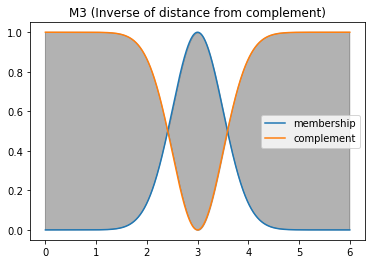

In [5]:
plt.plot(S,mu, label="membership")
plt.plot(S,mu_c, label="complement")

plt.fill_between(S,mu,mu_c, where=(mu_c>=mu),interpolate=True,color="black",alpha=0.3)
plt.fill_between(S,mu_c,mu, where=(mu_c<mu),interpolate=True,color="black",alpha=0.3)

plt.legend()
plt.title('M3 (Inverse of distance from complement)')
plt.show()

In [6]:
x=0
l = 2
n = 2
a = 3

y_mu = np.exp(-l*((x-a)**n))
y_muc = 1-y_mu

int1 = 2.4
int2 = 3.6
mid = 3

x = sy.Symbol('x')

#M1
M1_A1=sy.integrate(y_mu, (x, 0,int1))
M1_A2=sy.integrate(y_muc, (x, int1,mid))
M1_area=2*(M1_A1+M1_A2)
print(M1_area)

#M2
M2_A1=sy.integrate(y_mu, (x, 0,int1))
M2_A2=sy.integrate(1-y_mu, (x, int1,mid))
M2_area=2*(M2_A1+M2_A2)
print(M2_area)

#M3
M3_A1=sy.integrate(y_muc-y_mu, (x, 0,int1))
M3_A2=sy.integrate(y_mu-y_muc, (x, int1,mid))
M3_area=2*(M3_A1+M3_A2)
print(M3_area)

res = 0.5*(6*1-M3_area)
print(res)

1.20000005482793
1.20000005482793
3.59999989034415
1.20000005482793


Establish relationships between M1, M2, M3:
<br>  $ M1 = M2 = \frac{1}{2}(S*1-M3) $